<a href="https://colab.research.google.com/github/shinnew9/cse337-cse437RL/blob/main/lab12_SAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 12: Soft Actor Critic

Train a Soft Actor-Critic (SAC) agent on HalfCheetah-v4,
track its learning curve, and compare the result with your previous RL algorithm.

We will learn to use the **stable_baselines3** library


## To start
Run the following code that solves **the Pendulum problem**

In [ ]:
# Install dependencies
!pip install "stable-baselines3[extra]" "gymnasium[classic_control]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 4.1 MB/s eta 0:00:00


The following code trains a full SAC agent — with two critics, entropy tuning, and replay buffer — out of the box

In [ ]:
import gymnasium as gym
from stable_baselines3 import SAC

# Create environment
env = gym.make("Pendulum-v1")

# Create SAC model
model = SAC("MlpPolicy", env, verbose=1)

# Train the agent with N time steps
N = 4000
model.learn(total_timesteps=N)

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.23e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 37        |
|    time_elapsed    | 21        |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 18.4      |
|    critic_loss     | 0.22      |
|    ent_coef        | 0.813     |
|    ent_coef_loss   | -0.317    |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.37e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 34        |
|    time_elapsed    | 46        |
|    total_timesteps | 1600      |
| train/             |           |
|    actor_loss      | 43.2      |
|    critic_loss     | 0.136     |
|    ent_coef        | 0.649     |
|    ent_coef_loss   | -0.61     |
|    learning_rate   | 0.0003    |
|    n_updates       | 1499      |
----------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -1.3e+03 |
| time/              |          |
|    episodes        | 12       |
|    fps             | 32       |
|    time_elapsed    | 72       |
|    total_timesteps | 2400     |
| train/             |          |
|    actor_loss      | 63       |
|    critic_loss     | 0.225   

# Visualize the result

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gymnasium as gym
from stable_baselines3 import SAC
from IPython.display import HTML

env = gym.make("Pendulum-v1", render_mode="rgb_array")


N_steps = 500

frames = []
obs, _ = env.reset()
for _ in range(N_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        obs, _ = env.reset()

env.close()

# Create matplotlib animation
fig = plt.figure()
img = plt.imshow(frames[0])

def animate(i):
    img.set_data(frames[i])
    return [img]

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=30)

plt.close()
HTML(ani.to_html5_video())


/usr/local/lib/python3.12/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

## Exercise 1: Soft Actor-Critic on HalfCheetah
**Goal:**
Adapt the existing Soft Actor-Critic (SAC) implementation from the Pendulum-v1 environment to train and evaluate a SAC agent on the more challenging HalfCheetah-v4 task.

### Instructions

1. Adapt your code: Modify your previous SAC implementation so that it runs on the HalfCheetah-v4 environment from MuJoCo.

2. Reward Logger:
Implement a custom RewardLogger callback to record episode rewards during training (you will have to search online about how to create a class for logger).
After training, use the logged data to plot the learning curve (episode reward vs. timesteps).

3. Experimentation:
    * Compare the performance of SAC on HalfCheetah-v4 with your previous algorithm.
    * Adjust the entropy temperature parameter (ent_coef or target_entropy) and observe how this affects: Exploration behavior, Convergence speed, and Final performance.

Answer the following questions
1. Did SAC reach a higher average reward or converge faster than your previous method?

2. How did changing the temperature for entropy affect the performance and stability of learning?

3. Describe any differences you observed in exploration or motion behavior of the agent.


### Deliverables

* Python notebook or script containing:
    * The adapted SAC training code
    * The RewardLogger implementation
    * Learning curve plots for SAC and your previous algorithm
    * Comparison of different entropy temperature settings

* The answer of the questions above

In [ ]:
!pip install gymnasium[mujoco]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.5/243.5 kB 15.9 MB/s eta 0:00:00



=== Training SAC on HalfCheetah with fixed alpha = 0.05 ===


/usr/local/lib/python3.12/dist-packages/gymnasium/envs/registration.py:512: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


[20000] episodes: 20, last 10 mean reward = -127.2, alpha = 0.0500
[40000] episodes: 40, last 10 mean reward = 2356.2, alpha = 0.0500
[60000] episodes: 60, last 10 mean reward = 3254.4, alpha = 0.0500
[80000] episodes: 80, last 10 mean reward = 3469.1, alpha = 0.0500
[100000] episodes: 100, last 10 mean reward = 3771.0, alpha = 0.0500
[120000] episodes: 120, last 10 mean reward = 3848.7, alpha = 0.0500
[140000] episodes: 140, last 10 mean reward = 4098.7, alpha = 0.0500
[160000] episodes: 160, last 10 mean reward = 4143.1, alpha = 0.0500
[180000] episodes: 180, last 10 mean reward = 4266.7, alpha = 0.0500
[200000] episodes: 200, last 10 mean reward = 4144.5, alpha = 0.0500
[220000] episodes: 220, last 10 mean reward = 4490.9, alpha = 0.0500
[240000] episodes: 240, last 10 mean reward = 4598.4, alpha = 0.0500
[260000] episodes: 260, last 10 mean reward = 4775.8, alpha = 0.0500
[280000] episodes: 280, last 10 mean reward = 4821.2, alpha = 0.0500
[300000] episodes: 300, last 10 mean rewar

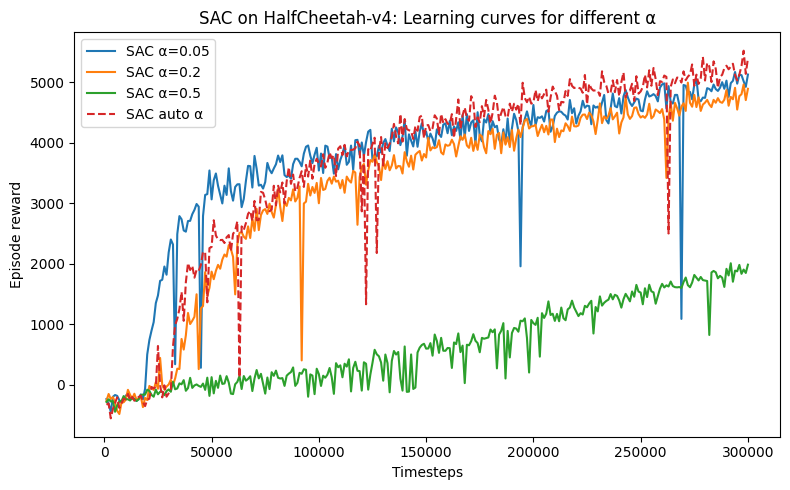

In [ ]:
import gymnasium as gym
import numpy as np
import torch as th
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt


# =========================================
# 0. Utils
# =========================================

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    th.manual_seed(seed)


# =========================================
# 1. Replay Buffer
# =========================================

class ReplayBuffer:
    def __init__(self, obs_dim, act_dim, size=int(1e6)):
        self.obs_buf = np.zeros((size, obs_dim), dtype=np.float32)
        self.next_obs_buf = np.zeros((size, obs_dim), dtype=np.float32)
        self.acts_buf = np.zeros((size, act_dim), dtype=np.float32)
        self.rews_buf = np.zeros((size,), dtype=np.float32)
        self.done_buf = np.zeros((size,), dtype=np.float32)
        self.max_size = size
        self.ptr = 0
        self.size = 0

    def store(self, obs, act, rew, next_obs, done):
        self.obs_buf[self.ptr] = obs
        self.acts_buf[self.ptr] = act
        self.rews_buf[self.ptr] = rew
        self.next_obs_buf[self.ptr] = next_obs
        self.done_buf[self.ptr] = done

        self.ptr = (self.ptr + 1) % self.max_size
        self.size = min(self.size + 1, self.max_size)

    def sample_batch(self, batch_size=256):
        idxs = np.random.randint(0, self.size, size=batch_size)
        batch = dict(
            obs=th.as_tensor(self.obs_buf[idxs], dtype=th.float32),
            acts=th.as_tensor(self.acts_buf[idxs], dtype=th.float32),
            rews=th.as_tensor(self.rews_buf[idxs], dtype=th.float32).unsqueeze(-1),
            next_obs=th.as_tensor(self.next_obs_buf[idxs], dtype=th.float32),
            done=th.as_tensor(self.done_buf[idxs], dtype=th.float32).unsqueeze(-1),
        )
        return batch


# =========================================
# 2. Networks
# =========================================

class MLP(nn.Module):
    def __init__(self, in_dim, out_dim, hidden_sizes=(256, 256), act=nn.ReLU):
        super().__init__()
        layers = []
        last = in_dim
        for h in hidden_sizes:
            layers.append(nn.Linear(last, h))
            layers.append(act())
            last = h
        layers.append(nn.Linear(last, out_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


class GaussianPolicy(nn.Module):
    """
    Stochastic policy π(a|s): Gaussian with Tanh squashing.
    Outputs actions in [-1, 1] (per dimension).
    """
    def __init__(self, obs_dim, act_dim, hidden_sizes=(256, 256), log_std_bounds=(-20, 2)):
        super().__init__()
        self.net = MLP(obs_dim, 2 * act_dim, hidden_sizes)
        self.log_std_bounds = log_std_bounds
        self.act_dim = act_dim

    def forward(self, obs):
        mu_logstd = self.net(obs)
        mu, log_std = th.chunk(mu_logstd, 2, dim=-1)
        log_std = th.tanh(log_std)
        log_std_min, log_std_max = self.log_std_bounds
        log_std = log_std_min + 0.5 * (log_std_max - log_std_min) * (log_std + 1.0)
        std = th.exp(log_std)
        return mu, std

    def sample(self, obs):
        """Reparameterization trick: return action and log_prob."""
        mu, std = self.forward(obs)
        normal = th.distributions.Normal(mu, std)
        z = normal.rsample()
        action = th.tanh(z)
        log_prob = normal.log_prob(z) - th.log(1 - action.pow(2) + 1e-6)
        log_prob = log_prob.sum(axis=-1, keepdim=True)
        return action, log_prob, th.tanh(mu)

    def act(self, obs_np, deterministic=False):
        obs = th.as_tensor(obs_np, dtype=th.float32).unsqueeze(0)
        if deterministic:
            with th.no_grad():
                mu, _ = self.forward(obs)
                a = th.tanh(mu)
        else:
            with th.no_grad():
                a, _, _ = self.sample(obs)
        return a.cpu().numpy()[0]


class QNetwork(nn.Module):
    def __init__(self, obs_dim, act_dim, hidden_sizes=(256, 256)):
        super().__init__()
        self.q = MLP(obs_dim + act_dim, 1, hidden_sizes)

    def forward(self, obs, act):
        x = th.cat([obs, act], dim=-1)
        return self.q(x)


# =========================================
# 3. SAC Agent
# =========================================

class SACAgent:
    def __init__(
        self,
        obs_dim,
        act_dim,
        act_low,
        act_high,
        gamma=0.99,
        tau=0.005,
        lr=3e-4,
        alpha=0.2,
        automatic_entropy_tuning=False,
        target_entropy=None,
        device="cpu",
    ):
        self.obs_dim = obs_dim
        self.act_dim = act_dim

        # env용 numpy scale
        self.act_low = np.array(act_low, dtype=np.float32)
        self.act_high = np.array(act_high, dtype=np.float32)
        # 학습용 torch scale
        self.device = device
        self.act_low_t = th.as_tensor(self.act_low, dtype=th.float32, device=device)
        self.act_high_t = th.as_tensor(self.act_high, dtype=th.float32, device=device)

        self.gamma = gamma
        self.tau = tau

        # Networks
        self.policy = GaussianPolicy(obs_dim, act_dim).to(device)
        self.q1 = QNetwork(obs_dim, act_dim).to(device)
        self.q2 = QNetwork(obs_dim, act_dim).to(device)
        self.q1_target = QNetwork(obs_dim, act_dim).to(device)
        self.q2_target = QNetwork(obs_dim, act_dim).to(device)
        self.q1_target.load_state_dict(self.q1.state_dict())
        self.q2_target.load_state_dict(self.q2.state_dict())

        # Optimizers
        self.pi_opt = optim.Adam(self.policy.parameters(), lr=lr)
        self.q1_opt = optim.Adam(self.q1.parameters(), lr=lr)
        self.q2_opt = optim.Adam(self.q2.parameters(), lr=lr)

        # Entropy temperature
        self.automatic_entropy_tuning = automatic_entropy_tuning
        if automatic_entropy_tuning:
            if target_entropy is None:
                target_entropy = -float(act_dim)  # heuristic
            self.target_entropy = target_entropy
            self.log_alpha = th.zeros(1, requires_grad=True, device=device)
            self.alpha_opt = optim.Adam([self.log_alpha], lr=lr)
            self._alpha = None
        else:
            self._alpha = alpha

    @property
    def alpha(self):
        if self.automatic_entropy_tuning:
            return self.log_alpha.exp()
        else:
            return th.tensor(self._alpha, device=self.device)

    def select_action(self, obs, deterministic=False):
        """
        obs: np.ndarray
        returns: np.ndarray in env action space [low, high]
        """
        a = self.policy.act(obs, deterministic=deterministic)  # [-1,1] numpy
        # scale to env bounds (numpy 연산)
        a_scaled = self.act_low + 0.5 * (a + 1.0) * (self.act_high - self.act_low)
        return a_scaled

    def update(self, replay: ReplayBuffer, batch_size=256):
        if replay.size < batch_size:
            return {}

        batch = replay.sample_batch(batch_size)
        obs = batch["obs"].to(self.device)
        acts = batch["acts"].to(self.device)
        rews = batch["rews"].to(self.device)
        next_obs = batch["next_obs"].to(self.device)
        done = batch["done"].to(self.device)

        # --------- Critic update ---------
        with th.no_grad():
            next_a, next_logp, _ = self.policy.sample(next_obs)
            # rescale action to env range (torch)
            next_a_scaled = self.act_low_t + 0.5 * (next_a + 1.0) * (self.act_high_t - self.act_low_t)

            q1_next = self.q1_target(next_obs, next_a_scaled)
            q2_next = self.q2_target(next_obs, next_a_scaled)
            q_next_min = th.min(q1_next, q2_next)
            alpha = self.alpha
            target_q = rews + (1.0 - done) * self.gamma * (q_next_min - alpha * next_logp)

        q1_val = self.q1(obs, acts)
        q2_val = self.q2(obs, acts)
        q1_loss = ((q1_val - target_q) ** 2).mean()
        q2_loss = ((q2_val - target_q) ** 2).mean()

        self.q1_opt.zero_grad()
        q1_loss.backward()
        self.q1_opt.step()

        self.q2_opt.zero_grad()
        q2_loss.backward()
        self.q2_opt.step()

        # --------- Policy update ---------
        a_pi, logp_pi, _ = self.policy.sample(obs)
        a_pi_scaled = self.act_low_t + 0.5 * (a_pi + 1.0) * (self.act_high_t - self.act_low_t)
        q1_pi = self.q1(obs, a_pi_scaled)
        q2_pi = self.q2(obs, a_pi_scaled)
        q_pi = th.min(q1_pi, q2_pi)

        alpha_detached = self.alpha.detach()
        pi_loss = (alpha_detached * logp_pi - q_pi).mean()

        self.pi_opt.zero_grad()
        pi_loss.backward()
        self.pi_opt.step()

        # --------- Entropy temperature update (if auto) ---------
        alpha_loss = th.tensor(0.0)
        if self.automatic_entropy_tuning:
            alpha = self.alpha
            alpha_loss = -(alpha * (logp_pi + self.target_entropy).detach()).mean()
            self.alpha_opt.zero_grad()
            alpha_loss.backward()
            self.alpha_opt.step()

        # --------- Target network Polyak update ---------
        with th.no_grad():
            for p, p_targ in zip(self.q1.parameters(), self.q1_target.parameters()):
                p_targ.data.mul_(1 - self.tau)
                p_targ.data.add_(self.tau * p.data)
            for p, p_targ in zip(self.q2.parameters(), self.q2_target.parameters()):
                p_targ.data.mul_(1 - self.tau)
                p_targ.data.add_(self.tau * p.data)

        return {
            "q1_loss": q1_loss.item(),
            "q2_loss": q2_loss.item(),
            "pi_loss": pi_loss.item(),
            "alpha_loss": alpha_loss.item() if self.automatic_entropy_tuning else 0.0,
            "alpha": self.alpha.item(),
        }


# =========================================
# 4. RewardLogger callback
# =========================================

class RewardLogger:
    """
    Logs episode rewards vs global timesteps.
    """
    def __init__(self):
        self.ep_rewards = []
        self.ep_lengths = []
        self.timesteps = []
        self._current_return = 0.0
        self._current_len = 0
        self._t = 0

    def step(self, reward, done):
        self._t += 1
        self._current_return += reward
        self._current_len += 1

        if done:
            self.ep_rewards.append(self._current_return)
            self.ep_lengths.append(self._current_len)
            self.timesteps.append(self._t)
            self._current_return = 0.0
            self._current_len = 0


# =========================================
# 5. Training Loop
# =========================================

def train_sac_on_halfcheetah(
    total_steps=300_000,
    start_steps=10_000,
    batch_size=256,
    eval_interval=10_000,
    fixed_alpha=None,               # e.g. 0.05, 0.2, 0.5
    automatic_entropy_tuning=False,
    target_entropy=None,
    seed=42,
):
    set_seed(seed)
    env = gym.make("HalfCheetah-v4")  # v4 DeprecationWarning은 무시해도 됨
    obs_dim = env.observation_space.shape[0]
    act_dim = env.action_space.shape[0]
    act_low = env.action_space.low
    act_high = env.action_space.high

    device = th.device("cuda" if th.cuda.is_available() else "cpu")

    agent = SACAgent(
        obs_dim=obs_dim,
        act_dim=act_dim,
        act_low=act_low,
        act_high=act_high,
        gamma=0.99,
        tau=0.005,
        lr=3e-4,
        alpha=fixed_alpha if not automatic_entropy_tuning else 0.2,
        automatic_entropy_tuning=automatic_entropy_tuning,
        target_entropy=target_entropy,
        device=device,
    )

    replay = ReplayBuffer(obs_dim, act_dim, size=int(1e6))
    logger = RewardLogger()

    obs, _ = env.reset(seed=seed)
    for t in range(1, total_steps + 1):
        # 1) action 선택
        if t < start_steps:
            act = env.action_space.sample()
        else:
            act = agent.select_action(obs, deterministic=False)

        # 2) 환경 step
        next_obs, rew, terminated, truncated, info = env.step(act)
        done = terminated or truncated
        logger.step(rew, done)

        replay.store(obs, act, rew, next_obs, float(done))
        obs = next_obs

        if done:
            obs, _ = env.reset()

        # 3) 학습
        if t >= start_steps:
            agent.update(replay, batch_size=batch_size)

        # 4) 로그
        if t % eval_interval == 0:
            if logger.ep_rewards:
                print(f"[{t}] episodes: {len(logger.ep_rewards)}, last 10 mean reward = "
                      f"{np.mean(logger.ep_rewards[-10:]):.1f}, alpha = {agent.alpha.item():.4f}")

    env.close()
    return logger


# =========================================
# 6. Run Experiments with Different α
# =========================================

set_seed(42)

total_steps = 300_000   # 필요하면 줄여서 테스트하고, 나중에 늘려도 됨
alphas = [0.05, 0.2, 0.5]
loggers = {}

for a in alphas:
    print(f"\n=== Training SAC on HalfCheetah with fixed alpha = {a} ===")
    logger = train_sac_on_halfcheetah(
        total_steps=total_steps,
        start_steps=10_000,
        batch_size=256,
        eval_interval=20_000,
        fixed_alpha=a,
        automatic_entropy_tuning=False,
        seed=42,
    )
    loggers[a] = logger

print("\n=== Training SAC on HalfCheetah with automatic entropy tuning ===")
logger_auto = train_sac_on_halfcheetah(
    total_steps=total_steps,
    start_steps=10_000,
    batch_size=256,
    eval_interval=20_000,
    fixed_alpha=None,
    automatic_entropy_tuning=True,
    target_entropy=None,  # default -|A|
    seed=42,
)


# =========================================
# 7. Plot learning curves
# =========================================

plt.figure(figsize=(8,5))
for a, logger in loggers.items():
    plt.plot(logger.timesteps, logger.ep_rewards, label=f"SAC α={a}")
plt.plot(logger_auto.timesteps, logger_auto.ep_rewards, label="SAC auto α", linestyle="--")
plt.xlabel("Timesteps")
plt.ylabel("Episode reward")
plt.title("SAC on HalfCheetah-v4: Learning curves for different α")
plt.legend()
plt.tight_layout()
plt.show()
